<a href="https://colab.research.google.com/github/ShreshthaJha6/MachineLearningProjects/blob/main/Binary%20classification%20using%20Logistic%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report

In [14]:
data = pd.read_csv('/content/drive/MyDrive/Social_Network_Ads.csv')

In [4]:
print(data.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None


In [6]:
print(data.describe())

            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    150000.000000    1.000000


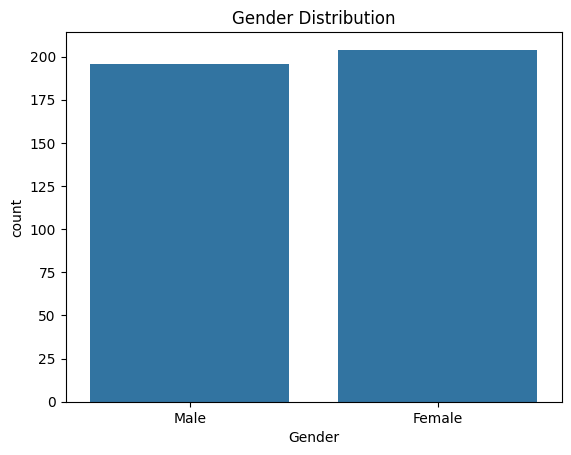

In [7]:
# Gender distribution
sns.countplot(x='Gender', data=data)
plt.title("Gender Distribution")
plt.show()

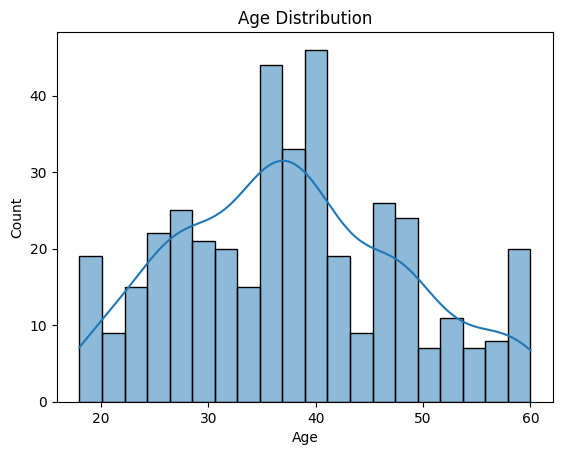

In [8]:
# Age distribution
sns.histplot(data['Age'], kde=True, bins=20)
plt.title("Age Distribution")
plt.show()

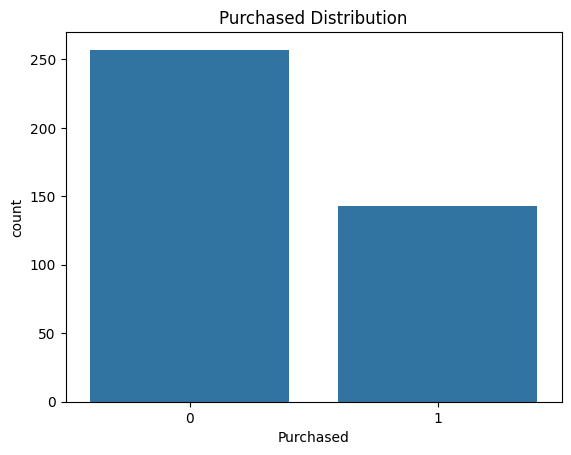

In [9]:
sns.countplot(x='Purchased', data=data)
plt.title("Purchased Distribution")
plt.show()

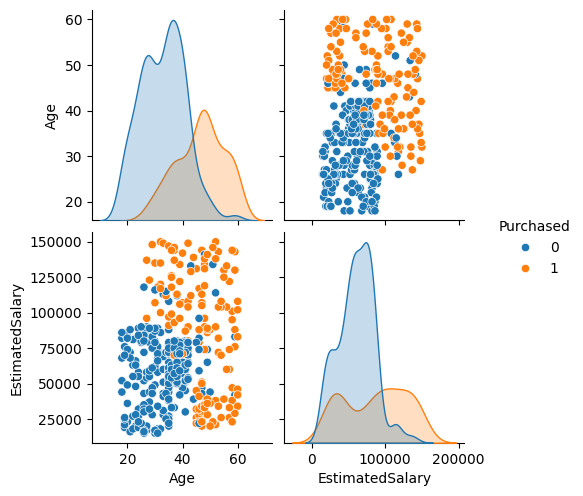

In [15]:
sns.pairplot(data, hue='Purchased', vars=['Age', 'EstimatedSalary'])
plt.show()

In [16]:
data.isnull().head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


In [17]:
data = data.dropna()

In [18]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [19]:
#label encoding for gender
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

In [20]:
X = data[['Gender', 'Age', 'EstimatedSalary']]
y = data['Purchased']

In [21]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [22]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [24]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

In [25]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)


In [26]:
print("\nModel Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("ROC-AUC Score:", roc_auc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Evaluation Metrics:
Accuracy: 0.8875
Precision: 0.9130434782608695
Recall: 0.75
ROC-AUC Score: 0.9697802197802198

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.91      0.75      0.82        28

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.89      0.89      0.88        80



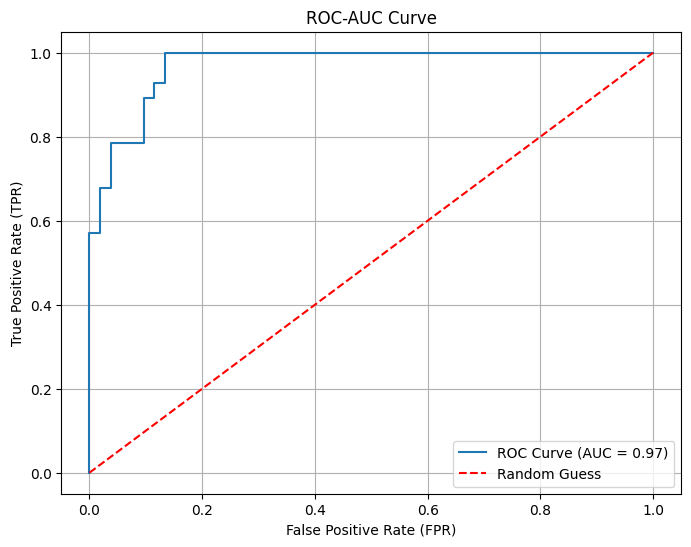

In [28]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Guess')
plt.title("ROC-AUC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend()
plt.grid()
plt.show()

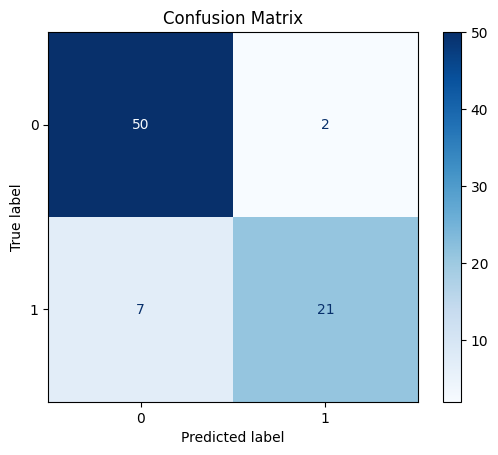

In [29]:
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()